In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('Reviews.csv')

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df = df.head(2000)

In [13]:
df.shape

(2000, 10)

Quick EDA

In [14]:
df['Score']

0       5
1       1
2       4
3       2
4       5
       ..
1995    5
1996    5
1997    4
1998    4
1999    5
Name: Score, Length: 2000, dtype: int64

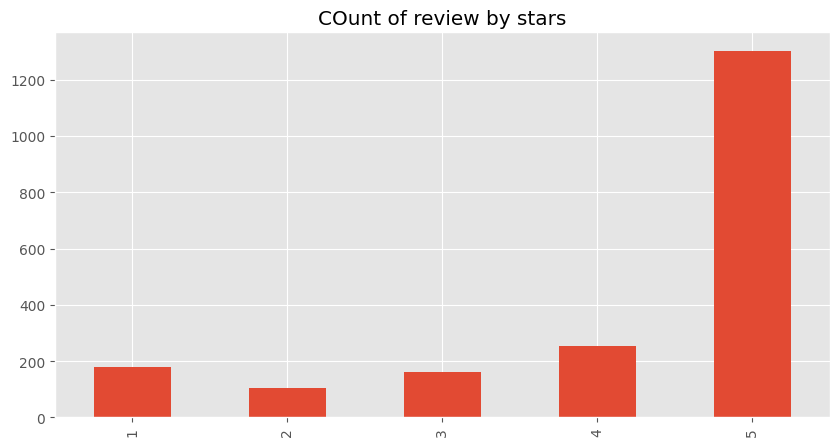

In [16]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='COunt of review by stars',figsize=(10,5))

Positive towards positive side


In [18]:
example = df['Text'][50]

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

Stuff nltk can do

In [20]:
tokens = nltk.word_tokenize(example
                  )

In [21]:
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [24]:
tagged = nltk.pos_tag(tokens)
tagged #pos means part of speech

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [27]:
entities = nltk.chunk.ne_chunk(tagged) #grouping tokens

In [28]:
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


VADER

In [29]:
#Vader takes a rule based approach for setniment analysis

In [31]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [34]:
 from tqdm.notebook import tqdm #used for genrating progress bar indicators

In [35]:
sia = SentimentIntensityAnalyzer()

In [36]:

import time

for i in tqdm(range(100)):
    time.sleep(0.1)  # Simulate work

  0%|          | 0/100 [00:00<?, ?it/s]

In [50]:
sia.polarity_scores('I am super sad ')

{'neg': 0.388, 'neu': 0.125, 'pos': 0.487, 'compound': 0.2023}

In [51]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Running the polarity score on the entire dataset

In [53]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/2000 [00:00<?, ?it/s]

In [68]:
vaders = pd.DataFrame(res).T #.T means transpose
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
1996,0.000,0.754,0.246,0.9744
1997,0.025,0.744,0.231,0.9978
1998,0.000,0.719,0.281,0.9501
1999,0.053,0.839,0.108,0.7003


In [69]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})

In [70]:
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
1995,1996,0.000,0.754,0.246,0.9744
1996,1997,0.025,0.744,0.231,0.9978
1997,1998,0.000,0.719,0.281,0.9501
1998,1999,0.053,0.839,0.108,0.7003


In [71]:
vaders = vaders.merge(df,how='left')

In [72]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.000,0.754,0.246,0.9744,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...
1996,1997,0.025,0.744,0.231,0.9978,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...
1997,1998,0.000,0.719,0.281,0.9501,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...
1998,1999,0.053,0.839,0.108,0.7003,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...


Lets use Ratings from reviews and compare the performance of Vader model

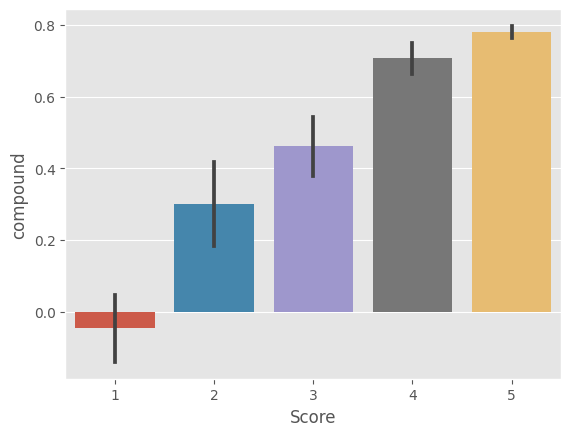

In [73]:
ax = sns.barplot(data=vaders,x='Score',y='compound')
